# ABSTRACT

The goal of this study is to discover a passive portfolio for the lay investor with the objectives to 1) yield a return above the Dow Jones market index while 2) accepting risk levels similar to the market as a whole. To accomplish this some security selection is acceptable, balanced by risk free asset holdings. Methods of study: Using Yahoo Finance as the primary data source, 9 stocks were chosen among the Dow Jones universe of stocks by calculating portfolio weights with the Markowitz Portfolio optimization Model, and then ETFs were chosen qualitatively.

In [6]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import portfolioopt as pfopt
import seaborn as sns
import scipy.optimize as sco

In [7]:
#creates a list of all csv files
globbed_files = glob.glob("./FD/*.csv") 

# pd.concat takes a list of dataframes as an agrument
data = [] 
for csv in globbed_files:
    frame = pd.read_csv(csv)
    frame['Ticker'] = os.path.basename(csv)[0:-4]
    data.append(frame)

#dont want pandas to try an align row indexes
df = pd.concat(data) 
df.to_csv("./processed_data/combined_df.csv")

In [8]:
df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
table = df.pivot(columns='Ticker')
table.head()

Adj Close                                                         \
Ticker           AAPL        AXP         BA        CAT       CSCO        CVX   
Date                                                                           
2012-12-01  66.936584  52.137589  63.407551  71.841957  16.033588  83.201050   
2013-01-01  57.291748  53.343983  62.153885  79.335419  16.784267  88.594398   
2013-02-01  55.519497  56.570377  64.703293  74.481262  17.020893  90.133186   
2013-03-01  56.002468  61.403679  72.697792  70.127075  17.053530  92.129776   
2013-04-01  56.017647  62.268364  77.405998  68.272499  17.069857  94.603218   

                                                         ...             \
Ticker            DIS         GE          GS         HD  ...        NKE   
Date                                                     ...              
2012-12-01  44.846249  16.209488  115.922050  53.637295  ...  22.355888   
2013-01-01  49.275391  17.362700  134.369980  58.034088  ...  23.827166   
2013-02-01  49.924717  18.095240  136.096649  59.404285  ...  24.007906   
2013-03-01  51.945843  18.164736  134.179153  60.514328  ...  26.216343   
2013-04-01  57.469662  17.512627  133.194366  63.960045  ...  28.255537   

                                                                              \
Ticker            PFE         PG        TRV        UNH        UTX          V   
Date                                                                           
2012-12-01  19.769781  54.865826  61.452816  48.562717  70.133430  34.221767   
2013-01-01  21.503965  60.741158  67.554276  49.627762  74.888245  35.650864   
2013-02-01  21.763485  62.064590  69.241837  48.045712  77.436676  35.815670   
2013-03-01  22.948263  62.781555  72.487816  51.425533  80.377502  38.669796   
2013-04-01  23.115252  62.545284  73.955864  54.080112  78.536461  38.355606   

                                             
Ticker             VZ        WMT        XOM  
Date                                         
2012-12-01  31.935965  57.268002  68.349136  
2013-01-01  32.186913  59.037048  71.049927  
2013-02-01  34.742420  59.737560  70.718224  
2013-03-01  36.698689  63.155720  71.615105  
2013-04-01  40.252823  66.018028  70.724976  

[5 rows x 29 columns]

In [9]:
#Calculating the monthly returns
df = table.pct_change()
df.head()

Adj Close                                                    \
Ticker          AAPL       AXP        BA       CAT      CSCO       CVX   
Date                                                                     
2012-12-01       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-01 -0.144089  0.023139 -0.019772  0.104305  0.046819  0.064823   
2013-02-01 -0.030934  0.060483  0.041018 -0.061185  0.014098  0.017369   
2013-03-01  0.008699  0.085439  0.123556 -0.058460  0.001917  0.022152   
2013-04-01  0.000271  0.014082  0.064764 -0.026446  0.000957  0.026847   

                                                    ...                      \
Ticker           DIS        GE        GS        HD  ...       NKE       PFE   
Date                                                ...                       
2012-12-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2013-01-01  0.098763  0.071144  0.159141  0.081973  ...  0.065812  0.087719   
2013-02-01  0.013177  0.042190  0.012850  0.023610  ...  0.007585  0.012068   
2013-03-01  0.040483  0.003841 -0.014089  0.018686  ...  0.091988  0.054439   
2013-04-01  0.106338 -0.035900 -0.007339  0.056941  ...  0.077783  0.007277   

                                                                        \
Ticker            PG       TRV       UNH       UTX         V        VZ   
Date                                                                     
2012-12-01       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-01  0.107085  0.099287  0.021931  0.067797  0.041760  0.007858   
2013-02-01  0.021788  0.024981 -0.031878  0.034030  0.004623  0.079396   
2013-03-01  0.011552  0.046879  0.070346  0.037977  0.079689  0.056308   
2013-04-01 -0.003763  0.020252  0.051620 -0.022905 -0.008125  0.096846   

                                
Ticker           WMT       XOM  
Date                            
2012-12-01       NaN       NaN  
2013-01-01  0.030891  0.039515  
2013-02-01  0.011866 -0.004669  
2013-03-01  0.057220  0.012682  
2013-04-01  0.045321 -0.012429  

[5 rows x 29 columns]

/Users/Ryan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'daily returns')

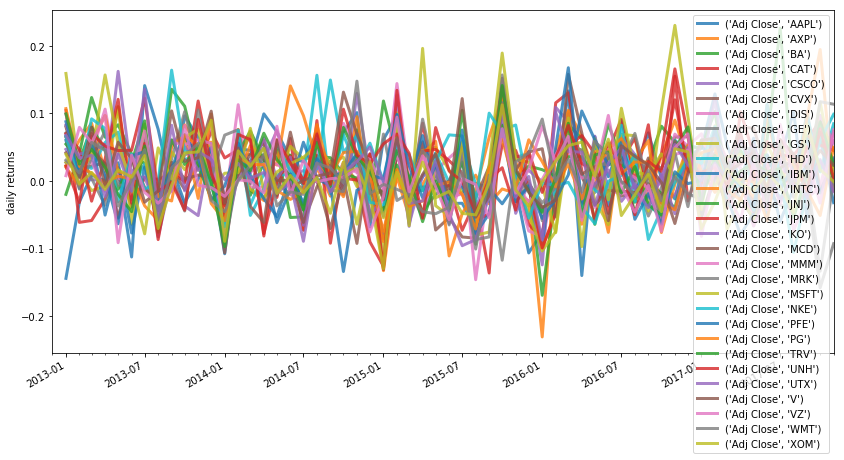

In [10]:
# Draw daily returns of the portfolio
plt.figure(figsize=(14, 7))
months = mdates.MonthLocator()  # every month

for c in df.columns.values:
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(months)
    datemin = df.index[0]
    datemax = df.index[-1]
    ax.set_xlim(datemin, datemax)
    plt.gcf().autofmt_xdate() # Rotation

plt.legend(loc='upper right', fontsize=10)
plt.ylabel('daily returns')


In [118]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix, period):
    if period=='day':
        returns = np.sum(mean_returns*weights) *252
        std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    elif period=='month':
        returns = np.sum(mean_returns*weights) *12
        std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(12)
    elif period=='quarter':
        returns = np.sum(mean_returns*weights) *4
        std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(4)
    elif period=='year':
        returns = np.sum(mean_returns*weights) *1
        std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(1)
    else:
        raise Exception('wrong period')
    
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix, period)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [119]:
# Defaults
stocks = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM']
num_assets = len(stocks)
returns =df
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 50000
risk_free_rate = 0.00071
period = 'day'

In [120]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix, period)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [121]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix, period)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [122]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix, period)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [135]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix, period)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix, period)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 5.79
Annualised Volatility: 0.46


           Adj Close                                                 ...  \
Ticker          AAPL  AXP    BA  CAT CSCO  CVX  DIS   GE   GS    HD  ...   
allocation       0.0  0.0  6.31  0.0  0.0  0.0  0.0  0.0  0.0  7.43  ...   

                                                                    
Ticker       NKE  PFE   PG  TRV    UNH  UTX      V   VZ   WMT  XOM  
allocation  6.91  0.0  0.0  0.0  39.93  0.0  10.41  0.0  1.53  0.0  

[1 rows x 29 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 3.03
Annualised Volatility: 0.36


           Adj Close                                                ...        \
Ticker          AAPL   AXP   BA  CAT CSCO  CVX  DIS   GE   GS   HD  ...   NKE   
allocation      0.56  2.8

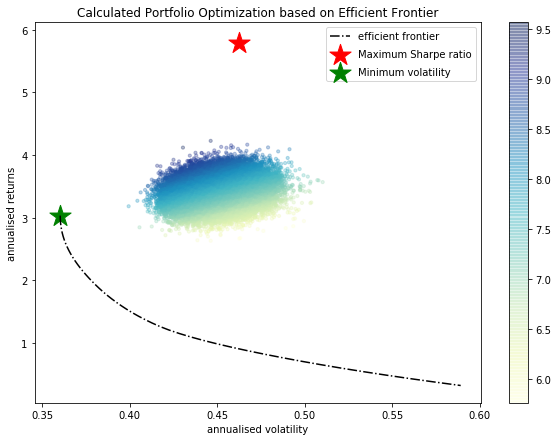

In [136]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [16]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix, period)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix, period)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    print("-"*80)
    print("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
        print(txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 5.79
Annualised Volatility: 0.46


           Adj Close                                                 ...  \
Ticker          AAPL  AXP    BA  CAT CSCO  CVX  DIS   GE   GS    HD  ...   
allocation       0.0  0.0  6.31  0.0  0.0  0.0  0.0  0.0  0.0  7.43  ...   

                                                                    
Ticker       NKE  PFE   PG  TRV    UNH  UTX      V   VZ   WMT  XOM  
allocation  6.91  0.0  0.0  0.0  39.93  0.0  10.41  0.0  1.53  0.0  

[1 rows x 29 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 3.03
Annualised Volatility: 0.36


           Adj Close                                                ...        \
Ticker          AAPL   AXP   BA  CAT CSCO  CVX  DIS   GE   GS   HD  ...   NKE   
allocation      0.56  2.8

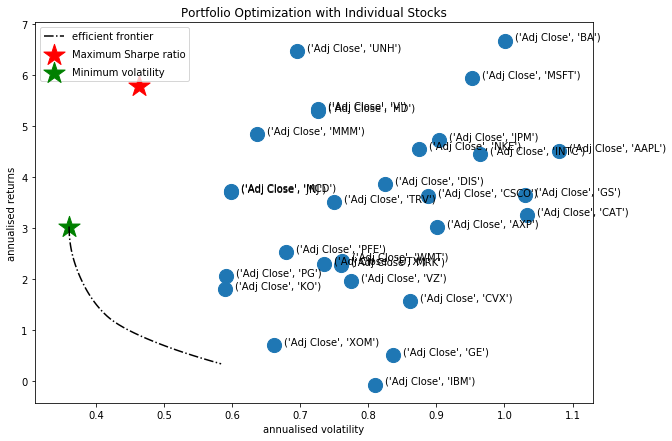

In [17]:
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

Now, we get the optimization weights. Based on this analysis, 9 stocks that are well-diversified across industry were selected: Microsoft Corporation (MSFT) in Software industry; Johnson & Johnson (JNJ) in Drug Manufacturers industry; 3M Company (MMM) in Diversified Industrials; NIKE, Inc. (NKE) in Footwear & Accessories industry; Visa Inc. (V) in Credit Services industry; The Home Depot, Inc. (HD) in Home Improvement Stores industry; The Boeing Company (BA) in Aerospace & Defense industry; UnitedHealth Group Incorporated (UNH) in Health Care Plans industry; McDonald's Corporation (MCD) in restaurants industry.

# Portfolio construction

### OVERVIEW OF SECURITY SELECTION AND ASSET ALLOCATION

I conducted security selection and both asset allocation processes to build the portfolio, using both qualitative and quantitative methods. First, a risk-free asset was selected. We choose the 3-month Treasury Bill as a risk-free asset and we note that in terms of the monthly price data from the past ten years, the 3-month Treasury Bill is increasing recently. We estimate that 3-month Treasury Bill has not yet peaked and is an appropriate risk-free asset to invest in both short term and long term.

In order to diversify assets across vehicles, we choose multiple risky assets types, including monetary instruments, ETFs, and stocks. The monetary instrument and ETFs were chosen qualitatively for adherence to our passive and diversified approach. For the monetary instrument, we chose to invest in Fidelity® Investments Money Market Tax Exempt - Class I. As a mutual fund, this matches our passive approach criteria and provides for diversification among a broad category of monetary instruments. Furthermore, this is a very conservative asset, which can be accessed without paying US federal taxes and will provide stability towards the portfolio as a whole. To further diversify and mitigate macroeconomic and inflation risk, following four ETFs were added to the portfolio mix.

1) Vanguard High Dividend Yield ETF, which meets our conservative-to-moderate risk aversion. As an index fund focused on dividends, this can offer both diversification and an opportunity for growth via income. It also matches our passive criteria in that it requires little management. 2) iShares TIPS Bond ETF - This TIP can protect the portfolio return from inflation. 3) Vanguard Total Stock Market ETF, which diversifies and expands our stock portfolio. 4). iShares Core US Aggregate Bond ETF, which helps the portfolio distribute successfully among total U.S. investment-grade bond market.

Stock security selection For the stocks, the Dow Jones offerings comprised the universe of options as a qualitative decision to align with the goal of a portfolio for the lay investor as well as to capture the US market returns and to diversity securities across varied industries. Which securities to select among the Dow Jones was discovered quantitatively. From the past 5 years of monthly price data for the stocks of companies in the Dow-Jones 30 Industrial (Yahoo finance website), we conducted Markowitz Portfolio optimization Model of all Dow Jones stocks. The prices are in the table at the end of this report. According to the five years of monthly price, the return, sample mean, variance and standard deviation of the returns for each company are all computed.

In [11]:
df = pd.read_csv("./processed_data/portfolio_returns.csv")
df['Date']=pd.to_datetime(df['Date'],format='%d-%b-%y').dt.strftime('%Y-%m-%d') 
returns = df.set_index('Date')

returns.head()

,MSFT,JNJ,MMM,NKE,V,HD,BA,UNH,MCD,VYM,TIP,VTI,AGG,FTCC,T-bill
Date,,,,,,,,,,,,,,,
2018-03-26,0.075705,0.018145,0.022753,0.019805,0.031111,0.026950,0.024642,0.030581,0.019680,0.025395,-0.001781,0.026371,-0.000376,0.001,0.017
2018-03-27,-0.045959,-0.001256,-0.019931,0.003945,-0.026857,-0.009919,-0.023684,-0.004976,-0.003480,-0.011291,0.003836,-0.017715,0.002915,0.000,0.000
2018-03-28,-0.000894,0.001887,0.003104,-0.013601,-0.003492,0.000458,-0.003426,0.002478,0.005906,0.001105,0.000000,-0.002310,0.000563,0.000,0.000
2018-03-29,0.021031,0.005492,0.013762,0.005209,0.022481,0.019913,0.024561,-0.020595,-0.012815,0.011775,0.002133,0.013744,0.002905,0.000,0.000
2018-04-02,-0.030130,-0.028014,-0.031432,-0.022710,-0.010283,-0.029960,-0.016591,0.014953,0.008569,-0.022427,0.000976,-0.022767,-0.001028,0.000,0.000


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

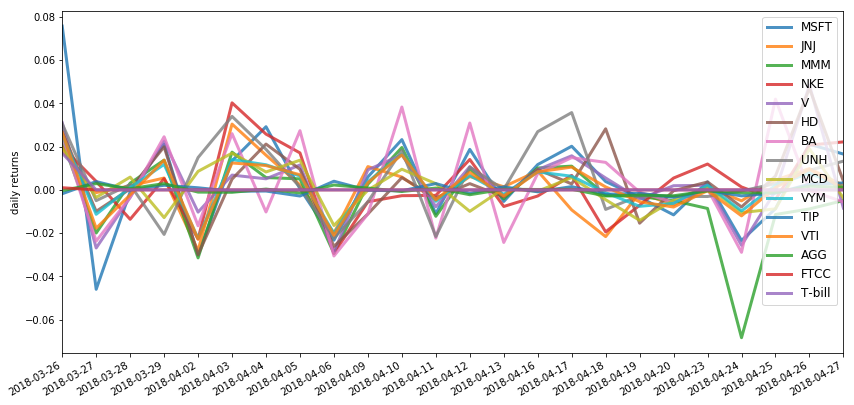

In [12]:
# Draw daily returns of the portfolio
plt.figure(figsize=(14, 7))
months = mdates.MonthLocator()  # every month

for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(months)
    datemin = df.index[0]
    datemax = df.index[-1]
    ax.set_xlim(datemin, datemax)
    plt.gcf().autofmt_xdate() # Rotation
    
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.xticks()

In [13]:
import pandas as pd
import numpy as np

data = {'MSFT': 0.059090993,'JNJ': 0.013080726, 'MMM': 0.01361722 , 'NKE': 0.013993338, 'V': 0.036440102, 'HD': 0.006996931, 'BA': 0.01854696, 'UNH': 0.131088008, 'MCD': 0.007145722, 'VYM': 0.15, 'TIP': 0.05, 'VTI': 0.25, 'AGG': 0.05, 'FTCC': 0.1, 'T-bill': 0.1}
weights = pd.Series(data)

returns = pd.read_csv('./processed_data/portfolio_returns.csv')
means_returns = returns.mean()
cov_matrix = returns.cov()


# Calculating Sharpe ratio, Portfolio returns and Variance

In [16]:
returns = np.sum(means_returns*weights) *252
std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
riskfree_rate = 0.0202
Sharpe_ratio = (returns-riskfree_rate)/std

print('Portfolio returns {}'.format(returns))
print('Portfolio variance {}'.format(std))
print('Sharpe ratio {}'.format(Sharpe_ratio))

Portfolio returns 0.4548017745950388
Portfolio variance 0.1419219295063431
Sharpe ratio 3.0622594838355446
